<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/%5Bdataprep2%5D%20GIS%20point%20of%20interest%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load these libraries
import pandas as pd
import json




In [2]:
from google.colab import drive
drive.mount('/content/drive')  # เชื่อม drive

Mounted at /content/drive


In [3]:
with open('/content/drive/MyDrive/bsc_DPDM_data/7-eleven.json') as json_file:  #with openเป็นการเข้าไปดูที่ไฟล์เลย
 this_json = json.loads(json_file.read())                                      

In [24]:
list(this_json.keys())[:10]

['1', '4', '6', '7', '9', '11', '16', '17', '18', '19']

In [5]:
len(this_json) #ต้องการ location ของ 7-11 ว่าอยู่ห่างจากบ้านกี่ 7-11

3653

In [25]:
this_json['6'] # เรียกดู id ที่ 6

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 16.0603149, 'lng': 102.7264856},
   'viewport': {'northeast': {'lat': 16.06160307989272,
     'lng': 102.7278208298927},
    'southwest': {'lat': 16.05890342010728, 'lng': 102.7251211701073}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png',
  'icon_background_color': '#4B96F3',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/convenience_pinlet',
  'name': '7-Eleven',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 3072,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/100135907463246314962">nuttapong chinnapuk</a>'],
    'photo_reference': 'ARywPAIuwYgKEeh9_5vpztMT_JbNv0OakveKoYeKCVvX2RyHmpDJw1w05XJIVVx9w5h9Aoai9Gb67AywD7szMyKpXsSzRol2DkngoztlEQu6goN6W2TsbB45jN-38BigXeivHTE4go3fzzTT5urf1wmSYgGzWw4g2IeDHCXM1oHEXvmTRk0Y',
    'width': 1728}],
  'place_id': 'ChIJzbBjEk2BGDER4YEKqD5kwlI',
  'rating': 4,
  'refe

In [7]:
#วนลูปหาตำแหน่งที่ตั้งของ id 6
check1 = list()
for row in this_json['6']:
    check1.append(row['geometry']['location'])
check1 

[{'lat': 16.0603149, 'lng': 102.7264856},
 {'lat': 16.0564741, 'lng': 102.7268436},
 {'lat': 16.0595413, 'lng': 102.7294307},
 {'lat': 16.0751998, 'lng': 102.7356017},
 {'lat': 16.070648, 'lng': 102.7344055},
 {'lat': 16.0582995, 'lng': 102.7360953},
 {'lat': 16.0573901, 'lng': 102.7192322}]

In [26]:
#วนลูปหาตำแหน่งที่ตั้งของทุก id    // ดูว่ามีเซเว่นอยู่ตรงไหนบ้าง
seven_id = {} #สร้าง dict ขึ้นมา  // เพื่อรวบรวม list ของเเต่ละโลเคชั่นไว้// เก็บไว้ เพื่อจะได้เรียกดูได้ว่าอันไหนที่มีไอดีเหมือนกันบ้้าง
for t in this_json:
    l = list()  
    for x in this_json[t]:
        l.append(x['geometry']['location'])
    #print(t) # t = id
    #print(l)
    seven_id[t] = l  # dict id = t สมาชิกคือ l

In [27]:
seven_id # ได้ key ที่มีสมาชิกเป็นตำแหน่ง

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [10]:
l # ตห. 7-11 ของบ้าน id สุดท้าย

[{'lat': 13.7374346, 'lng': 100.6267268},
 {'lat': 13.7356967, 'lng': 100.6189741},
 {'lat': 13.754974, 'lng': 100.613215},
 {'lat': 13.7607113, 'lng': 100.6292369},
 {'lat': 13.7568211, 'lng': 100.6445227},
 {'lat': 13.7522027, 'lng': 100.6193615},
 {'lat': 13.7366139, 'lng': 100.6313462},
 {'lat': 13.7367845, 'lng': 100.6241795},
 {'lat': 13.7563129, 'lng': 100.6131975},
 {'lat': 13.7523059, 'lng': 100.6182354},
 {'lat': 13.7519672, 'lng': 100.6357339},
 {'lat': 13.7420702, 'lng': 100.6326465},
 {'lat': 13.7623488, 'lng': 100.644072},
 {'lat': 13.7528219, 'lng': 100.6206503},
 {'lat': 13.7609686, 'lng': 100.631794},
 {'lat': 13.74039, 'lng': 100.6252888},
 {'lat': 13.74231, 'lng': 100.6247883},
 {'lat': 13.7602053, 'lng': 100.6220398},
 {'lat': 13.7362923, 'lng': 100.6169101},
 {'lat': 13.7520004, 'lng': 100.6348106}]

# load data บ้าน

In [139]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/Data Supply.xlsx')
home.head()

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN
1,33.0,https://nayoo.co/khonkaen/posts/33,post,secondhand,sale,NaN,NaN,จันทร์ประเสริฐแกรนด์,NaN,6.0,...,NaN,NaN,NaN,NaN,985.0,985.0,NaT,2020-06-29 06:25:32,2021-10-11 07:41:34,NaN
2,495.0,https://nayoo.co/khonkaen/posts/495,post,secondhand,sale,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,1834.0,1834.0,NaT,2020-07-03 04:23:01,2021-09-02 00:02:12,NaN
3,564.0,https://nayoo.co/khonkaen/posts/564,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1198.0,1367.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN
4,566.0,https://nayoo.co/khonkaen/posts/566,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1196.0,1365.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN


In [45]:
this_seven = seven_id['25']
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [46]:
seven_id['25'][1]

{'lat': 16.4255945, 'lng': 102.8397278}

In [47]:
# เลือกบ้าน
this_home = home[home['post_id']== 25]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [36]:
this_home['longitude'][0]

102.8576126

In [32]:
for i in this_home.columns:  #วนดูชื่อคอลัมน์ทุกชื่อในตาราง
    print(i)

post_id
https://nayoo.co/khonkaen/posts/
type
post_type
listing_type
parent_id
draft_for
project_name
contact_name
province_id
district_id
district
sub_district_id
sub_district
บ้านเดี่ยว/บ้านแฝด
ต่อเติม
renovate
brand
zip_code
zone_id
zone
property_type_id
category
company_id
user_id
user
cover_image
cover_image_path
address_number
village_number
alley
street
route
name_th
name_en
description
excerpt
other_accommodation
logo_image_path
map_image_path
latitude
longitude
quality
quality_previous
standard_quality
create_quality
update_quality
quality_calculate_date
pin_score
approved
status
status_chat
reject_reason
is_review
total_ctr
total_mobile_ctr
total_email_ctr
total_line_ctr
total_facebook_ctr
starting_price
ending_price
number_of_rai
number_of_ngan
number_of_va
construct_year
plan_image_path
post_number
model
sell_price
rent_price
expire_date
expired
close_reason
number_of_unit
number_of_story
number_of_bedroom
number_of_bathroom
usable_area
central_cost
direction
furniture
rent

In [48]:
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [49]:
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [37]:
this_seven[0]['lat']

16.4229267

In [38]:
import geopy.distance #หาระยะห่างระหว่างจุด 2 จุด

In [39]:
loc1 = [this_home['latitude'][0], this_home['longitude'][0]]
loc2 =[this_seven[0]['lat'],this_seven[0]['lng']]

In [40]:
geopy.distance.geodesic(loc1,loc2).m

2026.3410640485051

# สร้าง id ของบ้านแต่ละหหลัง มีเซเว่นกี่อัน ใน รัศมี....

# HW4 สร้างตารางนี้
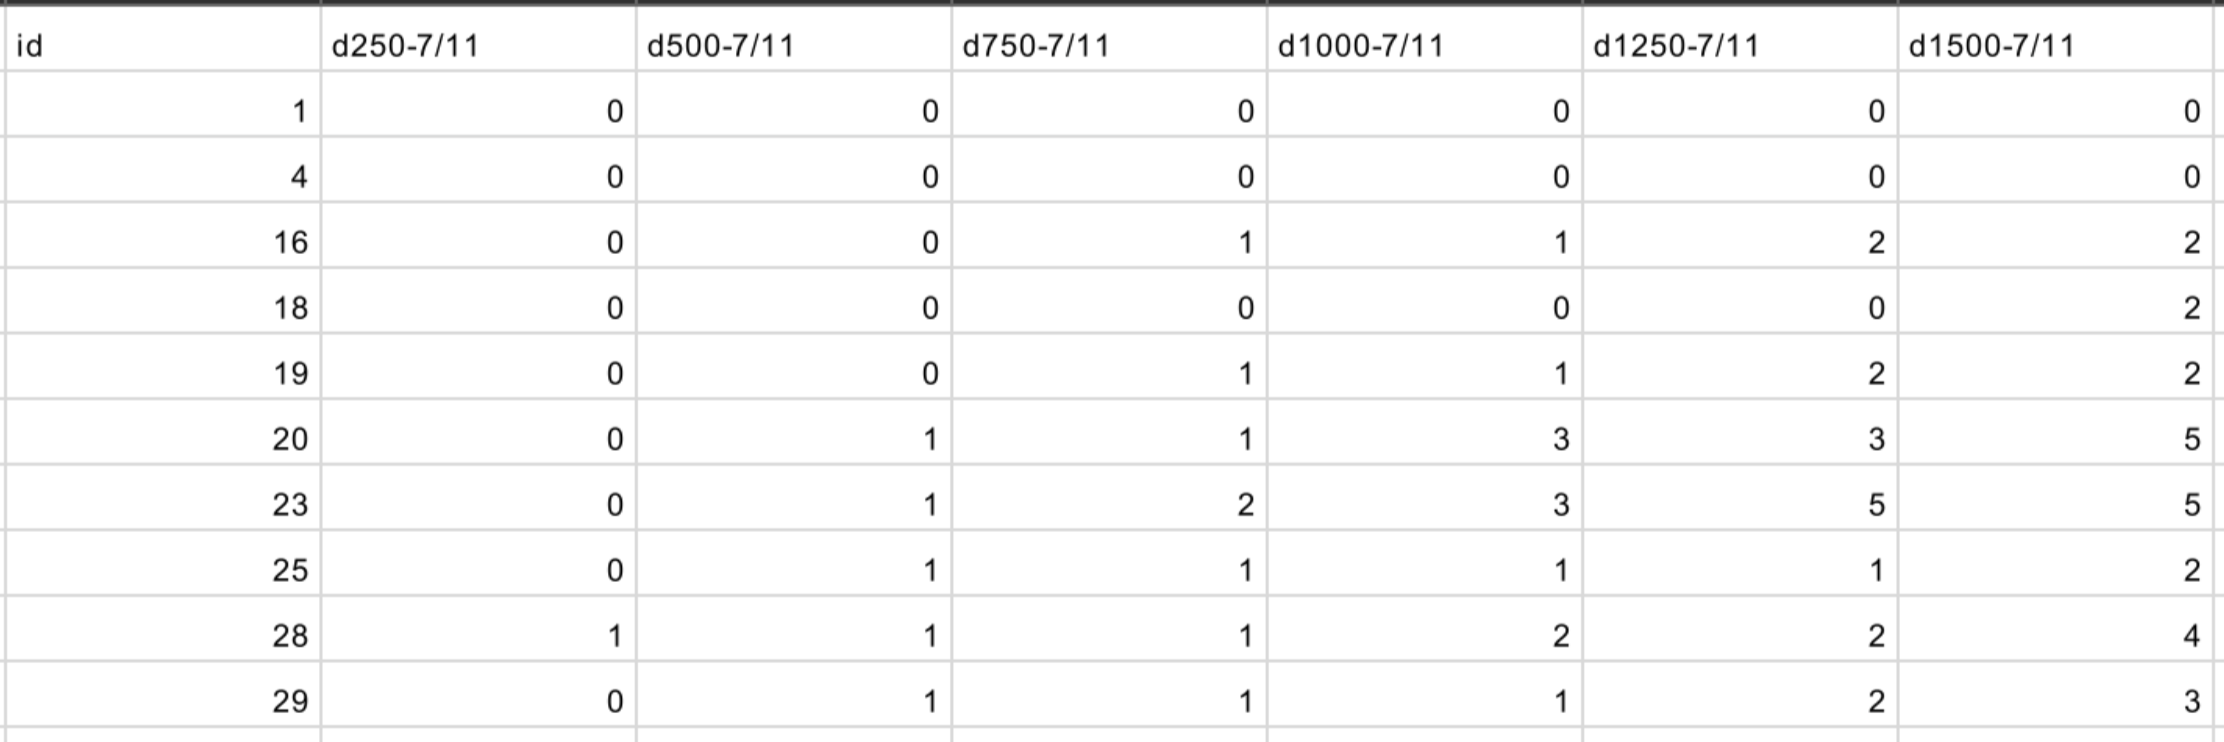

In [73]:
id = 25

In [74]:
# เลือกบ้าน
this_home = home[home['post_id']== id]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [96]:
#กำหนด lat long บ้าน
h_lat = this_home['latitude'].values[0] 
h_long = this_home['longitude'].values[0]

In [97]:
this_seven = seven_id[str(id)]
this_seven # output type list

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

### 1. คำนวณ ระยะทางระหว่าง แต่ละ 7-11 กับ บ้าน

In [98]:
#list ที่มีจน.สมาชิก เท่ากับ จน 7-11
seven_dict = list()
loc1 = [h_lat, h_long] #location บ้านจะไม่เปลี่ยนในlopeนี้
for seven in this_seven:
    loc2 =[seven['lat'],seven['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dict.append(dist)
    

In [99]:
seven_dict

[2026.3410640485051,
 2561.1300438835406,
 1802.022379353695,
 371.3607033942288,
 1362.068179007474,
 2122.0746378621734,
 2033.8379723813946,
 2226.324543949096,
 2028.9546247130654,
 2204.142864576839,
 2057.0874274932844,
 2358.161790753285,
 2078.784658007895,
 2095.8694500771535,
 2415.419008344456,
 2329.134777870196,
 2858.020875919802]

In [100]:
#อีกวิธีในการทำนับจำนวนเซเว่น  // เทียบการทำ np.array
def cal_seven_radius(seven_dict_list,radius):
    num =0 #เริ่มตัวนับเป็น 0
    for seven in seven_dict_list:
        if seven < radius:
           num = num + 1
    return num

In [101]:
cal_seven_radius(seven_dict,500)

1

In [102]:
import numpy as np #np.array มีคุณสมบัติของ เมมทริกมากขึ้น

In [103]:
np.array(seven_dict) < 500  #  False =ไม่น้อยกว่า 500

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [104]:
sum(np.array(seven_dict) < 500 ) #sum หาค่าความจริง

1

In [105]:
sum(np.array(seven_dict) < 2000 ) #sum หาค่าความจริง

3

In [106]:
record_list = list()

In [107]:
#สร้าง dict  เพื่อเตรียมเอาไปใส่ data frame
record_dict = {}
record_dict['id'] =id # record_dict['ชื่อคอลัมน์'] =int(id)
record_dict['d250-7/11'] = sum(np.array(seven_dict) < 250 )
record_dict['d500-7/11'] = sum(np.array(seven_dict) < 500 )
record_dict['d750-7/11'] = sum(np.array(seven_dict) < 750 )
record_dict['d1000-7/11'] = sum(np.array(seven_dict) < 1000 )
record_dict['d1250-7/11'] = sum(np.array(seven_dict) < 1250 )
record_dict['d1500-7/11'] = sum(np.array(seven_dict) < 1500 )

In [108]:
record_dict

{'id': 25,
 'd250-7/11': 0,
 'd500-7/11': 1,
 'd750-7/11': 1,
 'd1000-7/11': 1,
 'd1250-7/11': 1,
 'd1500-7/11': 2}

In [109]:
record_list.append(record_dict) #เพิ่ม dict ไปใน lits

In [110]:
import pandas as pd

pd.DataFrame(record_list)

,id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25,0,1,1,1,1,2


In [111]:
home['post_id'] #รid  ที่เราต้องการจะวน

0        25.0
1        33.0
2       495.0
3       564.0
4       566.0
       ...   
95    19495.0
96    19496.0
97    20164.0
98       31.0
99      570.0
Name: post_id, Length: 100, dtype: float64

In [140]:
record_list = list()
for id in home['post_id']:
    print(id)
    this_home = home[home['post_id']== id]
    h_lat = this_home['latitude'].values[0]  #.values[0]  ดึง values ออกมา // ถ้าไม่ใส่ 0 จะเป็น array
    h_long = this_home['longitude'].values[0]
    this_seven = seven_id[str(int(id))]  # ต้องการเปลี่ยนให้ตรง 
    #list ที่มีจน.สมาชิก เท่ากับ จน 7-11
    seven_dict = list()
    loc1 = [h_lat, h_long] #location บ้านจะไม่เปลี่ยนในloopนี้ เลยไม่ควรใส่ไป ใน loop
    for seven in this_seven:
        loc2 =[seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dict.append(dist)

 #สร้าง dict  เพื่อเตรียมเอาไปใส่ data frame
    record_dict = {}
    record_dict['post_id'] = id # record_dict['ชื่อคอลัมน์'] =int(id)
    record_dict['d250-7/11'] = sum(np.array(seven_dict) < 250 )
    record_dict['d500-7/11'] = sum(np.array(seven_dict) < 500 )
    record_dict['d750-7/11'] = sum(np.array(seven_dict) < 750 )
    record_dict['d1000-7/11'] = sum(np.array(seven_dict) < 1000 )
    record_dict['d1250-7/11'] = sum(np.array(seven_dict) < 1250 )
    record_dict['d1500-7/11'] = sum(np.array(seven_dict) < 1500 ) 
    record_list.append(record_dict)

   
final_table =pd.DataFrame(record_list)                                    
  

25.0
33.0
495.0
564.0
566.0
568.0
597.0
624.0
634.0
656.0
657.0
668.0
676.0
690.0
693.0
694.0
703.0
710.0
760.0
1070.0
1123.0
1128.0
1130.0
1135.0
1143.0
1149.0
1178.0
1402.0
1895.0
1915.0
1959.0
2033.0
2143.0
2244.0
2262.0
3286.0
3340.0
3357.0
3547.0
3617.0
3622.0
3721.0
3897.0
3905.0
5195.0
5978.0
5986.0
5994.0
6003.0
6007.0
6010.0
6017.0
6021.0
6022.0
6034.0
6045.0
6056.0
6069.0
7709.0
7713.0
7733.0
8514.0
8545.0
8682.0
8758.0
8950.0
9066.0
9141.0
9613.0
11264.0
12423.0
12680.0
12710.0
12759.0
13113.0
17128.0
17690.0
17754.0
17755.0
17778.0
17789.0
18092.0
18101.0
18112.0
18305.0
18629.0
18633.0
19450.0
19475.0
19478.0
19480.0
19481.0
19483.0
19492.0
19494.0
19495.0
19496.0
20164.0
31.0
570.0


In [141]:
final_table

,post_id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0,1,1,1,1,2
1,33.0,0,1,2,3,5,5
2,495.0,0,0,0,2,2,3
3,564.0,0,0,2,4,8,12
4,566.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...
95,19495.0,0,2,3,7,10,14
96,19496.0,0,0,0,1,4,9
97,20164.0,1,1,2,4,7,9
98,31.0,0,0,1,3,3,4


In [142]:
home.columns

Index(['post_id', 'https://nayoo.co/khonkaen/posts/', 'type', 'post_type',
       'listing_type', 'parent_id', 'draft_for', 'project_name',
       'contact_name', 'province_id',
       ...
       'cable_max', 'cable_free', 'cable_none', 'cable_ask',
       'position_previous', 'position_current', 'sold_out_at', 'created_at',
       'updated_at', 'deleted_at'],
      dtype='object', length=183)

In [143]:
h = home[['post_id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','project_name','district','zone','street','sell_price']]

In [144]:
h

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,project_name,district,zone,street,sell_price
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,1.0,กันยารัตน์ เดอวินเทจ,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,1.0,จันทร์ประเสริฐแกรนด์,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,โครงการหมู่บ้านเรา 2,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,โครงการหมู่บ้านเรา 2,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,0.0,NaN,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,5.0,NaN,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,2.0,ปันนา พาราไดซ์,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0


In [146]:
H = h.merge(final_table, left_on='post_id', right_on='post_id') # จะต่อด้วยKey อะไร   // ซ้ายของ unit
H

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4
